#**Actividad 3: PIA.- Entrenamiento de una red neuronal convolucional.  N1 LMV**


1.   BENJAMIN URIEL BARRIENTOS OROZCO 2000397 IMTC
2.   Adrian Alejandro Moran Alvarez 1951212 IMTC
3.   Jorge Yahir Berlanga Gómez 1963390 IMTC
4.   Luis Alberto Sánchez Álvarez 2077668 IMTC








#**PASO 1: IMPORTAR LIBRERIAS**

In [1]:
import os
import glob
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

#**PASO 2: CARGAR DATOS**

In [2]:
!pip install kaggle
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"potrochon69","key":"2b3fdceb17b7f4ebd59ff815939eec02"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d bhawks/pokemon-generation-one-22k

Dataset URL: https://www.kaggle.com/datasets/bhawks/pokemon-generation-one-22k
License(s): other
pokemon-generation-one-22k.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile

# Ruta al archivo ZIP descargado
zip_file_path = '/content/pokemon-generation-one-22k.zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [7]:
imagenes = []
etiquetas = []

In [8]:
# Ruta de la carpeta principal
carpeta_principal = '/content/Dataset/PokemonData'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
z = 0
for subcarpeta in subcarpetas:

    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario

        for x in glob.iglob(f'{subcarpeta}/*.jpg'):
          print(x)
          test_image = cv2.imread(x)

          # Formato de imagen
          img_resized = cv2.resize(test_image, (43,42), )

          # Guardar imagenes y etiquetas
          arreglo_imagen = np.array(img_resized)
          imagenes.append(arreglo_imagen)
          etiquetas.append(z)
    z += 1

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/content/Dataset/PokemonData/Kakuna/2d27488ba0d1431182616429d79c3cbd.jpg
/content/Dataset/PokemonData/Kakuna/Kakuna60.jpg
/content/Dataset/PokemonData/Kakuna/Kakuna52.jpg
/content/Dataset/PokemonData/Kakuna/Kakuna25.jpg
/content/Dataset/PokemonData/Kakuna/Kakuna59.jpg
/content/Dataset/PokemonData/Kakuna/ad0d8870fcd84d5bbcdabd79192e2586.jpg
/content/Dataset/PokemonData/Kakuna/429252afdec34ce09df1ce8763d7496f.jpg
/content/Dataset/PokemonData/Kakuna/Kakuna10.jpg
/content/Dataset/PokemonData/Kakuna/Kakuna21.jpg
/content/Dataset/PokemonData/Kakuna/309d8ea151294337a67076e0e759c0ea.jpg
/content/Dataset/PokemonData/Kakuna/c6ed7e4a8b7e4d03825b57e0908a6399.jpg
/content/Dataset/PokemonData/Kakuna/d84a931454894df9b4146a23ec78443d.jpg
/content/Dataset/PokemonData/Kakuna/f246b01a1aa44ef3a1b3a098587c9f38.jpg
/content/Dataset/PokemonData/Kakuna/Kakuna1.jpg
/content/Dataset/PokemonData/Kakuna/Kakuna11.jpg
/content/Dataset/PokemonData/Ka

In [9]:
etiquetas = np.array(etiquetas)

In [10]:
images = np.array(imagenes)

In [11]:
np.shape(images)

(18583, 42, 43, 3)

In [12]:
len(etiquetas)

18583

In [13]:
etiquetas[-1]

150

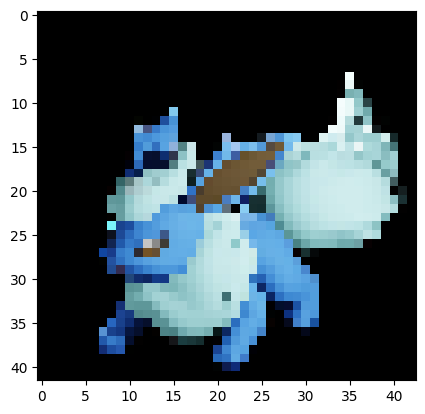

In [14]:
plt.imshow(imagenes[10])

In [15]:
# Convierte la imagen en un arreglo de numpy
arreglo_imagen = np.array(img_resized)
imagenes.append(arreglo_imagen)

In [16]:
print(f"Número de imágenes: {len(imagenes)}")
print(f"Número de etiquetas: {len(etiquetas)}")


Número de imágenes: 18584
Número de etiquetas: 18583


In [17]:
tamaño_minimo = min(len(imagenes), len(etiquetas))
imagenes = imagenes[:tamaño_minimo]
etiquetas = etiquetas[:tamaño_minimo]


In [18]:


images_train, images_test, labels_train, labels_test = train_test_split(
    imagenes, etiquetas, test_size=0.2, random_state=42
)


In [19]:
images_train, images_test, labels_train, labels_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)


#**PASO 3: PREPROCESAMIENTO DE DATOS**

In [20]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Ruta al dataset
dataset_path = '/content/Dataset/PokemonData'

# Tamaño al que redimensionaremos todas las imágenes
target_size = (64, 64)

# Inicializar listas para imágenes y etiquetas
images = []
labels = []

# Recorrer los subdirectorios
for label, class_dir in enumerate(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, class_dir)
    if os.path.isdir(class_path):  # Asegúrate de que sea un directorio
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            # Leer la imagen en escala de grises
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Redimensionar la imagen al tamaño objetivo
                img = cv2.resize(img, target_size)
                images.append(img)
                labels.append(label)  # Usa el índice del subdirectorio como etiqueta

# Convertir listas a arrays de NumPy
images = np.array(images, dtype='float32')  # Convertir imágenes a formato NumPy
labels = np.array(labels, dtype='int')      # Convertir etiquetas a NumPy

# Normalizar las imágenes (opcional)
images /= 255.0  # Escalar valores de píxeles entre 0 y 1

# Dividir en conjuntos de entrenamiento y prueba
images_train, images_test, labels_train, labels_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

print(f"Tamaño del conjunto de entrenamiento: {len(images_train)} imágenes")
print(f"Tamaño del conjunto de prueba: {len(images_test)} imágenes")



Tamaño del conjunto de entrenamiento: 16079 imágenes
Tamaño del conjunto de prueba: 4020 imágenes


Forma de las imágenes: (20099, 64, 64)
Forma de las etiquetas: (20099,)


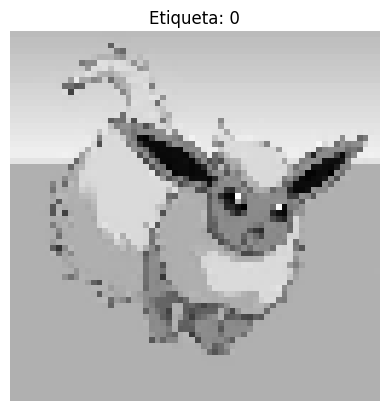

In [21]:
print(f"Forma de las imágenes: {images.shape}")  # Debería ser algo como (número_de_imágenes, 64, 64)
print(f"Forma de las etiquetas: {labels.shape}")  # Debería ser algo como (número_de_imágenes,)

# Mostrar una imagen de ejemplo y su etiqueta
import matplotlib.pyplot as plt

plt.imshow(images[0], cmap='gray')
plt.title(f"Etiqueta: {labels[0]}")
plt.axis('off')
plt.show()


Imagen cargada correctamente con forma: (200, 200)


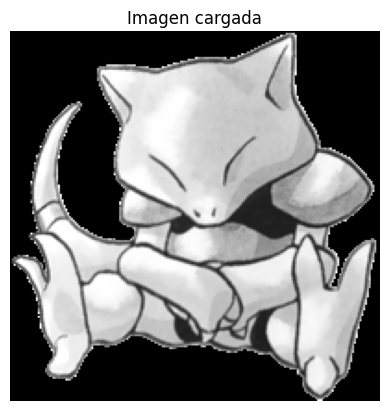

In [22]:
# Ruta al archivo
file = '/content/Dataset/PokemonData/Abra/001-063Abra_RG.png'

# Verificar si el archivo existe
if not os.path.exists(file):
    print(f"El archivo {file} no existe. Verifica la ruta.")
else:
    # Cargar la imagen en escala de grises
    images_test = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

    if images_test is None:
        print("La imagen no se pudo cargar. Verifica el formato del archivo.")
    else:
        print(f"Imagen cargada correctamente con forma: {images_test.shape}")
        # Convertir al tipo adecuado si es necesario
        images_test = images_test.astype('float32')

        # Mostrar la imagen
        plt.imshow(images_test, cmap='gray')
        plt.title("Imagen cargada")
        plt.axis('off')
        plt.show()


In [23]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Ruta del directorio que contiene las imágenes
ruta_directorio = '/content/Dataset/PokemonData'

# Inicializar listas para almacenar imágenes y etiquetas
imagenes = []
etiquetas = []

# Etiquetado automático según subdirectorios
for etiqueta, subdirectorio in enumerate(sorted(os.listdir(ruta_directorio))):
    ruta_subdirectorio = os.path.join(ruta_directorio, subdirectorio)

    # Asegurarse de que es un directorio
    if not os.path.isdir(ruta_subdirectorio):
        continue

    # Procesar cada imagen en el subdirectorio
    for nombre_archivo in os.listdir(ruta_subdirectorio):
        ruta_imagen = os.path.join(ruta_subdirectorio, nombre_archivo)

        # Verificar que sea un archivo de imagen válido
        if not nombre_archivo.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            continue

        # Leer la imagen en escala de grises
        imagen_prueba = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

        # Verificar que la imagen se cargó correctamente
        if imagen_prueba is None:
            print(f"Error al cargar la imagen: {ruta_imagen}")
            continue

        try:
            # Redimensionar la imagen a un tamaño uniforme
            imagen_redimensionada = cv2.resize(imagen_prueba, (43, 42))

            # Normalizar la imagen para que los valores estén entre 0 y 1
            imagen_redimensionada = imagen_redimensionada.astype('float32') / 255.0

            # Agregar la imagen y su etiqueta a las listas
            imagenes.append(imagen_redimensionada)
            etiquetas.append(etiqueta)

        except Exception as e:
            print(f"Error al procesar la imagen {ruta_imagen}: {e}")

# Convertir las listas a arrays de NumPy
imagenes = np.array(imagenes, dtype='float32')
etiquetas = np.array(etiquetas, dtype='int')

# Verificar formas de las matrices
print(f"Forma de imágenes: {imagenes.shape}")
print(f"Forma de etiquetas: {etiquetas.shape}")

# Dividir los datos en conjuntos de entrenamiento y prueba
images_train, images_test, labels_train, labels_test = train_test_split(
    imagenes, etiquetas, test_size=0.2, random_state=42
)

# Imprimir formas finales
print(f"Forma de images_train: {images_train.shape}")
print(f"Forma de images_test: {images_test.shape}")
print(f"Forma de labels_train: {labels_train.shape}")
print(f"Forma de labels_test: {labels_test.shape}")


Forma de imágenes: (20099, 42, 43)
Forma de etiquetas: (20099,)
Forma de images_train: (16079, 42, 43)
Forma de images_test: (4020, 42, 43)
Forma de labels_train: (16079,)
Forma de labels_test: (4020,)


In [24]:
# Dividir el dataset en 80% entrenamiento y 20% prueba
train_images, test_images, train_labels, test_labels = train_test_split(
    imagenes, etiquetas, test_size=0.2, random_state=42
)

# Mostrar formas de las divisiones
print(f"Forma de train_images: {train_images.shape}")
print(f"Forma de train_labels: {train_labels.shape}")
print(f"Forma de test_images: {test_images.shape}")
print(f"Forma de test_labels: {test_labels.shape}")


Forma de train_images: (16079, 42, 43)
Forma de train_labels: (16079,)
Forma de test_images: (4020, 42, 43)
Forma de test_labels: (4020,)


In [25]:
# Verificar las formas de las imágenes y etiquetas
print(f"train_images.shape: {train_images.shape}")
print(f"len(train_labels): {len(train_labels)}")
print(f"train_labels: {train_labels[:5]}")  # Muestra algunas etiquetas
print(f"test_images.shape: {test_images.shape}")
print(f"len(test_labels): {len(test_labels)}")
print(f"test_labels: {test_labels[:5]}")  # Muestra algunas etiquetas


train_images.shape: (16079, 42, 43)
len(train_labels): 16079
train_labels: [129   5  50   0  87]
test_images.shape: (4020, 42, 43)
len(test_labels): 4020
test_labels: [138  24  87  19  66]


In [26]:
# Normalizar los valores de píxeles
train_images = train_images / 255.0
test_images = test_images / 255.0

# Verificar los valores después de la normalización
print(f"Valores normalizados en train_images: {train_images[0].min()} a {train_images[0].max()}")
print(f"Valores normalizados en test_images: {test_images[0].min()} a {test_images[0].max()}")


Valores normalizados en train_images: 0.0004306036280468106 a 0.003921568859368563
Valores normalizados en test_images: 0.00035371011472307146 a 0.003921568859368563


In [27]:
# Número de clases (cambia según tu dataset)
NUMERO_DE_CLASES = len(set(train_labels))  # Encuentra el número único de clases

# Convertir etiquetas a formato one-hot
train_labels = to_categorical(train_labels, num_classes=NUMERO_DE_CLASES)
test_labels = to_categorical(test_labels, num_classes=NUMERO_DE_CLASES)

# Verificar la nueva forma de las etiquetas
print(f"Forma de train_labels: {train_labels.shape}")
print(f"Forma de test_labels: {test_labels.shape}")


Forma de train_labels: (16079, 151)
Forma de test_labels: (4020, 151)


#**PASO 4: SELECCION Y ENTRENAMIENTO DEL MODELO**

In [28]:
model = models.Sequential()
# Capas convolucionales
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(43, 42, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Capas completamente conectadas
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(151, activation='softmax'))  # Cambiar "151" según el número de clases


In [30]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Resumen del modelo
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 41, 40, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 18, 18, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 151)                 │           9,815 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,327 (1.02 MB)

 Trainable params: 266,327 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Agregar dimensión al final de las imágenes para el canal
images_train = images_train[..., np.newaxis]
images_test = images_test[..., np.newaxis]

# Entrenamiento
history = model.fit(
    images_train,
    labels_train,
    epochs=15,
    validation_data=(images_test, labels_test)
)

print("Entrenamiento finalizado.")


Epoch 1/15
503/503 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.0107 - loss: 4.9851 - val_accuracy: 0.0582 - val_loss: 4.4505
Epoch 2/15
503/503 ━━━━━━━━━━━━━━━━━━━━ 45s 89ms/step - accuracy: 0.0971 - loss: 4.2368 - val_accuracy: 0.1826 - val_loss: 3.8264
Epoch 3/15
503/503 ━━━━━━━━━━━━━━━━━━━━ 78s 80ms/step - accuracy: 0.2070 - loss: 3.5797 - val_accuracy: 0.2428 - val_loss: 3.5054
Epoch 4/15
503/503 ━━━━━━━━━━━━━━━━━━━━ 40s 78ms/step - accuracy: 0.2913 - loss: 3.1804 - val_accuracy: 0.2878 - val_loss: 3.2876
Epoch 5/15
503/503 ━━━━━━━━━━━━━━━━━━━━ 39s 78ms/step - accuracy: 0.3576 - loss: 2.8661 - val_accuracy: 0.3234 - val_loss: 3.1300
Epoch 6/15
503/503 ━━━━━━━━━━━━━━━━━━━━ 38s 76ms/step - accuracy: 0.3972 - loss: 2.6195 - val_accuracy: 0.3373 - val_loss: 3.1034
Epoch 7/15
503/503 ━━━━━━━━━━━━━━━━━━━━ 38s 76ms/step - accuracy: 0.4430 - loss: 2.3977 - val_accuracy: 0.3667 - val_loss: 2.9594
Epoch 8/15
503/503 ━━━━━━━━━━━━━━━━━━━━ 43s 80ms/step - accuracy: 0.4883 - loss: 2.1776 - 

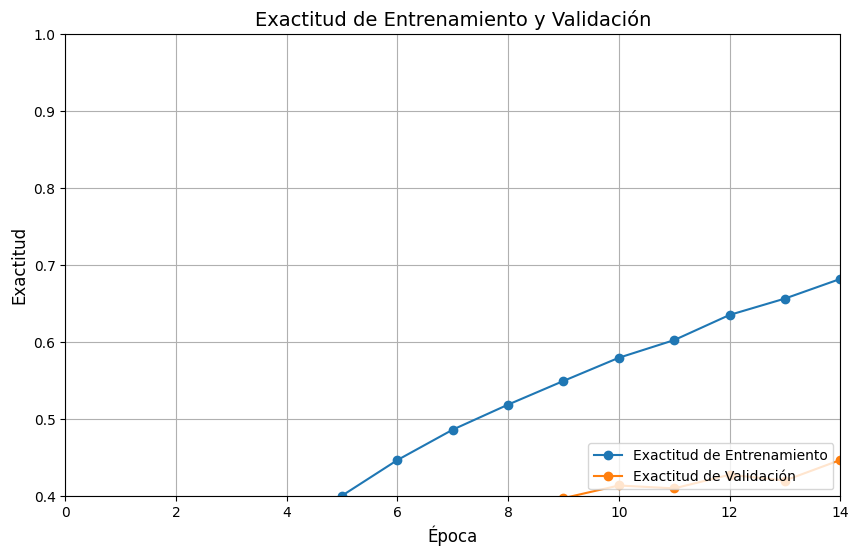

126/126 - 2s - 16ms/step - accuracy: 0.4470 - loss: 3.1042
Pérdida en prueba: 3.1041667461395264
Exactitud en prueba: 0.4470149278640747


In [32]:
import matplotlib.pyplot as plt

# Gráfica de la diferencia de exactitud entre entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Exactitud de Entrenamiento', marker='o')
plt.plot(history.history['val_accuracy'], label='Exactitud de Validación', marker='o')
plt.xlabel('Época', fontsize=12)
plt.ylabel('Exactitud', fontsize=12)
plt.title('Exactitud de Entrenamiento y Validación', fontsize=14)
plt.ylim([0.4, 1])  # Ajusta el rango de exactitud en el eje Y
plt.xlim([0, len(history.history['accuracy']) - 1])  # Ajusta el rango de las épocas
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(images_test, labels_test, verbose=2)

print(f'Pérdida en prueba: {test_loss}')
print(f'Exactitud en prueba: {test_acc}')


#**PASO 5: HACER PREDICCIONES**

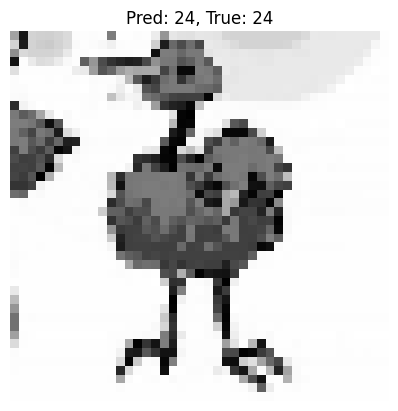

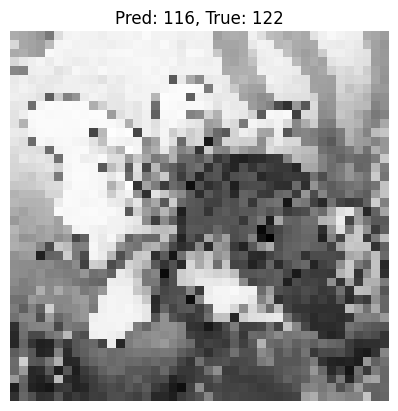

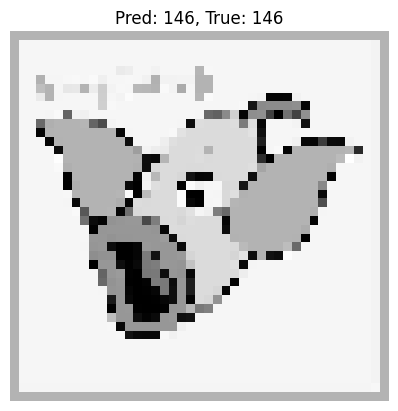

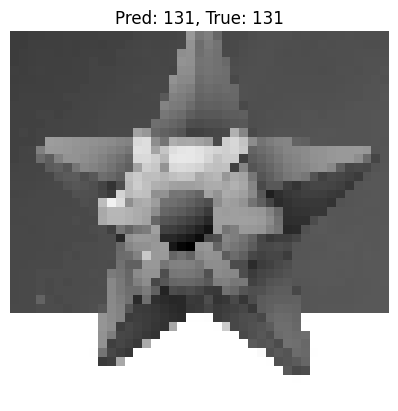

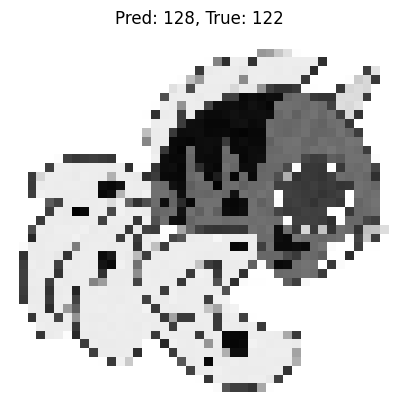

In [34]:
import matplotlib.pyplot as plt

# Mostrar 5 predicciones con sus imágenes
for idx in indices:
    predicted_class = predictions[idx].argmax()
    true_class = labels_test[idx]

    # Mostrar imagen
    plt.imshow(images_test[idx], cmap='gray')
    plt.title(f"Pred: {predicted_class}, True: {true_class}")
    plt.axis('off')
    plt.show()
